# Bunch commands for pyTao

In [1]:
from pytao import Tao, util
from pytao.util import parse_bool

import numpy as np

import os

In [2]:
# Point to local installation
BASE_DIR=os.environ['ACC_ROOT_DIR'] 
print('Bmad installation: ', BASE_DIR)


# Pick an example init
root = BASE_DIR+'tao/examples/csr_beam_tracking/'
os.chdir(root)
init = root+'tao.init'
# Make tao instance
tao=Tao()   
tao.init('-noplot -init '+init);

Bmad installation:  /Users/chrisonian/Code/bmad_svn/


---
# bunch1

In [3]:
# Bunch data for universe 1, branch 0, element 0 (beginnig) for the model.
tao.cmd('python bunch1 1@0>>0|model 1')

['beta_x;REAL;F;  3.1454698480000E-01',
 'alpha_x;REAL;F; -2.2075642140000E+00',
 'gamma_x;REAL;F;  1.8672376601123E+01',
 'phi_x;REAL;F;  0.0000000000000E+00',
 'eta_x;REAL;F;  0.0000000000000E+00',
 'etap_x;REAL;F;  0.0000000000000E+00',
 'sigma_x;REAL;F;  6.1862593076786E-05',
 'sigma_p_x;REAL;F;  4.7663415051489E-04',
 'emit_x;REAL;F;  1.2166641573809E-08',
 'norm_emit_x;REAL;F;  9.9992598367718E-07',
 'beta_y;REAL;F;  3.4385689760000E-01',
 'alpha_y;REAL;F;  1.9751085275000E+00',
 'gamma_y;REAL;F;  1.4253178370452E+01',
 'phi_y;REAL;F;  0.0000000000000E+00',
 'eta_y;REAL;F;  0.0000000000000E+00',
 'etap_y;REAL;F;  0.0000000000000E+00',
 'sigma_y;REAL;F;  6.4680627901879E-05',
 'sigma_p_y;REAL;F;  4.1642924071307E-04',
 'emit_y;REAL;F;  1.2166641573809E-08',
 'norm_emit_y;REAL;F;  9.9992598367719E-07',
 'beta_z;REAL;F;  0.0000000000000E+00',
 'alpha_z;REAL;F;  0.0000000000000E+00',
 'gamma_z;REAL;F;  0.0000000000000E+00',
 'phi_z;REAL;F;  0.0000000000000E+00',
 'eta_z;REAL;F;  0.00

In [4]:
%%tao
sho beam 0

-------------------------
Tao> sho beam 0
Cached bunch parameters:
  Parameters for bunch:       1
  Particles surviving:        1000
  Particles lost:             0
  Particles lost (%):         .000
  Charge live (C):              7.70000000E-11
  Centroid: -8.10391301E-22 -3.60173912E-21 -3.45166665E-22  9.12440576E-21  2.24108212E-20  0.00000000E+00
  RMS:       6.18625931E-05  4.76634151E-04  6.46806279E-05  4.16429241E-04  8.99377000E-04  0.00000000E+00
             norm_emitt           beta             alpha
  a:         9.99926012E-07  3.14546998E-01 -2.20756426E+00
  b:         9.99926012E-07  3.43851915E-01  1.97507994E+00
  x:         9.99925984E-07  3.14546985E-01 -2.20756421E+00
  y:         9.99925984E-07  3.43856898E-01  1.97510853E+00
  z:         0.00000000E+00  0.00000000E+00

Sigma Mat       x              px               y              py              z             pz
X     3.82698042E-09  2.68586425E-08  6.09119800E-26 -6.91251743E-25  3.90813706E-25  0.00000000E+

In [5]:
# Parse output into dict
bdata = util.parse_tao_python_data(tao.cmd('python bunch1 1@0>>0|model 1'))
bdata.keys()

ValueError: Unknown type: SPECIES

In [6]:
bdata['beam_saved']

NameError: name 'bdata' is not defined

In [7]:
xdat = tao.cmd_real('python bunch1 1@0>>8|model 1 x')
pxdat = tao.cmd_real('python bunch1 1@0>>8|model 1 px')
ydat = tao.cmd_real('python bunch1 1@0>>8|model 1 y')
pydat = tao.cmd_real('python bunch1 1@0>>8|model 1 py')
zdat = tao.cmd_real('python bunch1 1@0>>8|model 1 z')
pzdat = tao.cmd_real('python bunch1 1@0>>8|model 1 pz')
chargedat = tao.cmd_real('python bunch1 1@0>>8|model 1 charge')
p0cdat = tao.cmd_real('python bunch1 1@0>>8|model 1 p0c')
state = tao.cmd_integer('python bunch1 1@0>>8|model 1 state') # integers
# Unique p0C (eV), charge (pC)
set(p0cdat), sum(chargedat)*1e12

({41996891.31444237}, 77.0000000000011)

# Plot in matplotlib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
xdata = 1000*xdat
ydata = 1000*pxdat
weights = chargedat

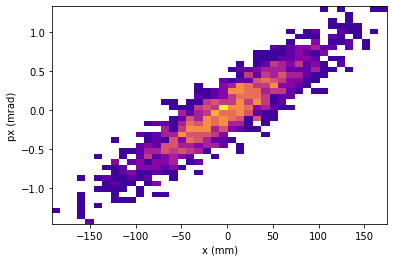

In [10]:
# hist2d

mycmap = plt.get_cmap('plasma') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
myvmin = 1e-30 # something tiny
# Bin particles
plt.hist2d(x=1000*xdata, y=ydata,  bins=2*[40], weights=weights, cmap=mycmap, vmin=myvmin)
plt.xlabel('x (mm)')
plt.ylabel('px (mrad)')
plt.show()

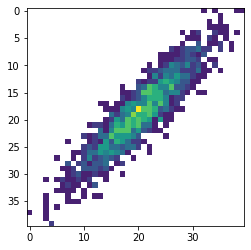

In [11]:
# Numpy histogram 2d, with custom color map

import matplotlib.colors as colors

mycmap = plt.get_cmap('viridis') # viridis plasma inferno magma and _r versions
mycmap.set_under(color='white') # map 0 to this color
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)
image = np.flip(H.T, axis=0) # 
imax = np.max(image)
norm=colors.Normalize(vmin=1e-12*imax, vmax=imax)
plt.imshow(image, cmap=mycmap, norm=norm)

In [12]:
np.min(image), np.max(image)

(0.0, 8.469999999999999e-13)

# Plot in Bokeh

In [13]:

from bokeh.plotting import figure, show, output_notebook
from bokeh import palettes, colors
from bokeh.models import ColumnDataSource, HoverTool
output_notebook(verbose=False, hide_banner=True)

pal = palettes.Viridis[256]
white=colors.named.white
pal[0] = white # replace 0 with white

In [14]:
H, xedges, yedges = np.histogram2d(xdata, ydata, weights=chargedat, bins=40)
xmin, xmax = min(xedges), max(xedges)
ymin, ymax = min(yedges), max(yedges)

In [15]:
ds = ColumnDataSource(data=dict(image=[H.transpose()]))   
p = figure(x_range=[xmin, xmax], y_range=[ymin, ymax], title='Bunch at end', 
           x_axis_label='z (mm)', y_axis_label='pz (1e-3)',
           plot_width=500, plot_height=500)
p.image(image='image', source=ds, 
    x=xmin, y=ymin, dw=xmax-xmin, dh=ymax-ymin, palette=pal)
show(p)